# General Curvilinear Motion

| Concept      |  Differential Relationship        |
| :---         |  :---:                            |
| Position     |  --                               |
| Velocity     |  $\vec{v} = \frac{d\vec{r}}{dt}$  |
| Acceleration |  $\vec{a} = \frac{d\vec{v}}{dt} = \frac{d^2\vec{r}}{dt^2} $               |

## Rectangular Components

| Concept      |  Components                                             | Magnitude                     | Unit Vector             |
| :---         |  :---:                                                  | :--:                          | :--:                    |
| Position     |  $\vec{r} = x \vec{\imath} + y \vec{\jmath} + z\vec{k}$ | $r = \sqrt{x^2 + y^2 + z^2}$  | $\vec{u}_r = \vec{r}/r$ |
| Velocity     |  $\vec{v} = v_x \vec{\imath} + v_y \vec{\jmath} + v_z\vec{k}$ | $v = \sqrt{v_x^2 + v_y^2 + v_z^2}$ | $\vec{u}_v = \vec{v}/v$ |
| Acceleration |  $\vec{a} = a_x \vec{\imath} + a_y \vec{\jmath} + a_z\vec{k}$ | $a = \sqrt{a_x^2 + a_y^2 + a_z^2}$ | $\vec{u}_a = \vec{a}/a$ |

### Example 12.9


## Motion of a Projectile

### Horizontal motion
\begin{align}
a_x   &= 0 \\
v_x   &= (v_0)_x \\
x     &= x_0 + (v_0)_x\, t \\
v_x^2 &= (v_0)^2_x \\
\end{align}

### Vertical motion
\begin{align}
a_y   &= -g \\
v_y   &= (v_0)_y - g\, t \\
y     &= y_0 + v_0\, t - \frac{1}{2}\, g\, t^2 \\
v_y^2 &= (v_0)^2_y - 2\, g\, (y - y_0) \\
\end{align}

### Example 12.12


## Normal and Tangential Components


### Example: Parabolic Path
$\vec{a} = -g \vec{k}$

End in *x-y* plane a distance $d$ away rotated by some angle $\theta$:

$\vec{r}(t_f) = \vec{r}(0) + d \cos \theta \vec{\imath} + d \sin\theta \vec{\jmath}$

\begin{array}
\,
\vec{r}(t) = \vec{r}_0 + \vec{v}_0 t + \frac{1}{2} \vec{a} t^2\\
\,\Rightarrow \\
v_{0x} t_f &= d \cos \theta \\
v_{0y} t_f &= d \sin \theta \\
v_{0z} t_f - \frac{1}{2} g t_f^2 &= 0 \\
\end{array}

The maximum height $h$ occurs when $\frac{dz}{dt} = 0 \rightarrow v_{0z} - g t_h = 0$
$t_h = v_{0z} / g$

$h = v_{0z} t_h - \frac{1}{2} g t_h^2 = v_{0z} \frac{v_{0z}}{g} - \frac{1}{2}g \left(\frac{v_{0z}}{g}\right)^2$

$\Rightarrow 2 g h = 2 v_{0z}^2 - v_{0z}^2 = v_{0z}^2$

$\Rightarrow v_{0z} = \sqrt{2 g h}$

$t_f =  2 v_{0z} / g = 2 \sqrt{2 g h} / g = 2 \sqrt{\frac{2 h}{g}}$

\begin{array}
\,\Rightarrow \vec{v}_0 &= \frac{d \cos \theta}{2} \sqrt{\frac{g}{2 h}} \vec{\imath} + \frac{d \sin \theta}{2} \sqrt{\frac{g}{2 h}} \vec{\jmath} + \sqrt{2 g h} \vec{k} \\
                        &= \sqrt{2 g h} \left( \frac{d}{4 h} (\cos \theta \vec{\imath} + \sin \theta \vec{\jmath}) + \vec{k} \right) \\
\end{array}

$\vec{r}(t) = \sqrt{2 g h} \, t \left( \frac{d}{4 h} (\cos \theta \vec{\imath} + \sin \theta \vec{\jmath}) \right) + (\sqrt{2 g h} \,t - \frac{1}{2}g t^2) \vec{k}$

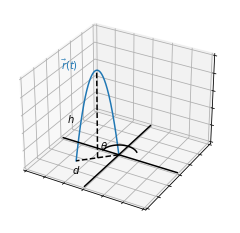

In [14]:
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.axes(projection='3d')
height = 10.
range_distance = 10.
plt.xlim([-1.5*range_distance, 1.5*range_distance])
plt.ylim([-1.5*range_distance, 1.5*range_distance])
azimuth = np.pi * 5/ 4  # angle from x-axis
acceleration_due_to_gravity = -9.80665
final_time = 2*np.sqrt(2*height/abs(acceleration_due_to_gravity))
times = np.linspace(0., final_time, num=1000)
initial_position = np.array([0., 0., 0.])
initial_velocity = np.array([
                    range_distance*np.cos(azimuth)/final_time,
                    range_distance*np.sin(azimuth)/final_time,
                    np.sqrt(2.*abs(acceleration_due_to_gravity*height))
                    ])
acceleration = np.array([0., 0., acceleration_due_to_gravity])
positions = np.outer(initial_position, np.ones(len(times))) + \
            np.outer(initial_velocity, times) + \
            0.5 * np.outer(acceleration, times**2)
ax.plot(positions[0], positions[1], positions[2])
ax.text(1.1*range_distance*np.cos(azimuth), 1.1*range_distance*np.sin(azimuth), 1.1*height, r'$\vec{r}(t)$', color='#1f77b4', ha='center', va='center')

# Range segment
ax.plot(positions[0], positions[1], np.zeros(len(positions[0])), color='k', linestyle='--')
ax.text(range_distance*np.cos(azimuth), range_distance*np.sin(azimuth), -0.1*height, r'$d$', ha='center', va='center')
# Height segment
ax.plot(0.5*range_distance*np.cos(azimuth)*np.ones(len(positions[0])),
        0.5*range_distance*np.sin(azimuth)*np.ones(len(positions[0])),
        np.linspace(0., height, num=len(positions[0])), color='k', linestyle='--')
ax.text(1.1*range_distance*np.cos(azimuth), 1.1*range_distance*np.sin(azimuth), 0.5*height, r'$h$', ha='center', va='center')
# x-axis
ax.plot([plt.xlim()[0],plt.xlim()[1]], [0., 0.], [0., 0.], color='k')
# y-axis
ax.plot([0., 0.], [plt.ylim()[0],plt.ylim()[1]], [0., 0.], color='k')
# azimuth arc
arc_radius = 0.3*range_distance/np.cos(azimuth)
arc_x_values = np.linspace(arc_radius*np.cos(azimuth), arc_radius)
arc_y_values = np.sqrt(arc_radius**2 - arc_x_values**2)
ax.plot(arc_x_values, arc_y_values, color='k')
ax.text(1.2*arc_radius, 0.5*1.2*arc_radius*np.sin(azimuth), 0.0*height, r'$\theta$', ha='center', va='center')
# Turn off ticks
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
plt.show()

$\vec{v}(t) = ? $

$\vec{u}_t(t) = ? $

$\vec{u}_n(t)0 = ? $

Plot $\vec{u}_t$ and $\vec{u}_n$ for three distinctly different points on the path (rising, peaking, falling)